## Baseline

In [24]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.keras.optimizers import Adadelta

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(6, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

# https://keras.io/optimizers/
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(learning_rate=0.1, rho=0.95, decay=0.0), metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5687 - loss: 1.4051 - val_accuracy: 0.9253 - val_loss: 0.2473
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9284 - loss: 0.2401 - val_accuracy: 0.9524 - val_loss: 0.1627
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9485 - loss: 0.1704 - val_accuracy: 0.9597 - val_loss: 0.1299
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9563 - loss: 0.1428 - val_accuracy: 0.9670 - val_loss: 0.1069
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9646 - loss: 0.1160 - val_accuracy: 0.9712 - val_loss: 0.0948
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9684 - loss: 0.1050 - val_accuracy: 0.9746 - val_loss: 0.0826
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9720 - loss: 0.0918 - val_accuracy: 0.9755 - val_loss: 0.0754
Epoch 8/12
469/469 ━━━━━━━━━━━━

## Change the kernel size to 5*5

In [25]:

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5),activation='relu',input_shape=input_shape)) # Chnage the kernel size to 5*5 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (5, 5), activation='relu')) # Chnage the kernel size to 5*5 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

# https://keras.io/optimizers/
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(learning_rate=0.1, rho=0.95, decay=0.0), metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5587 - loss: 1.4217 - val_accuracy: 0.9271 - val_loss: 0.2487
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9272 - loss: 0.2431 - val_accuracy: 0.9503 - val_loss: 0.1671
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9473 - loss: 0.1754 - val_accuracy: 0.9614 - val_loss: 0.1341
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9567 - loss: 0.1444 - val_accuracy: 0.9676 - val_loss: 0.1137
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9615 - loss: 0.1253 - val_accuracy: 0.9721 - val_loss: 0.0956
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9663 - loss: 0.1141 - val_accuracy: 0.9752 - val_loss: 0.0867
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9695 - loss: 0.0998 - val_accuracy: 0.9775 - val_loss: 0.0784
Epoch 8/12
469/469 ━━━━━━━━━━━━

Epoch 1/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9778 - loss: 0.0723 - val_accuracy: 0.9815 - val_loss: 0.0595
Epoch 2/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9782 - loss: 0.0658 - val_accuracy: 0.9830 - val_loss: 0.0524
Epoch 3/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9809 - loss: 0.0573 - val_accuracy: 0.9843 - val_loss: 0.0527
Epoch 4/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9813 - loss: 0.0588 - val_accuracy: 0.9831 - val_loss: 0.0509
Epoch 5/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9831 - loss: 0.0555 - val_accuracy: 0.9836 - val_loss: 0.0519
Epoch 6/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9832 - loss: 0.0539 - val_accuracy: 0.9844 - val_loss: 0.0485
Epoch 7/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9852 - loss: 0.0497 - val_accuracy: 0.9858 - val_loss: 0.0442
Epoch 8/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9854 - loss: 0.0472 - 

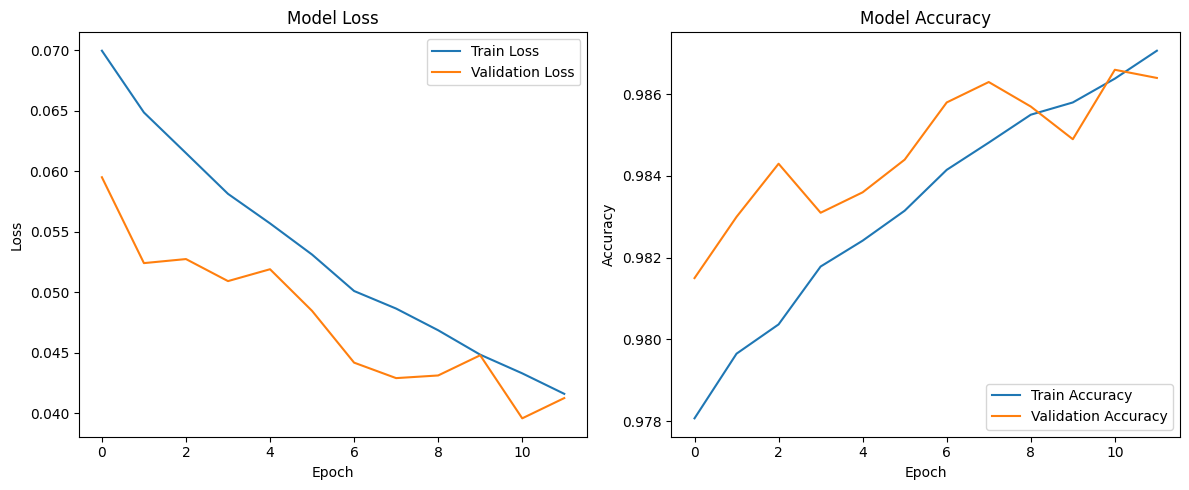

In [26]:
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train, epochs=12, validation_data=(x_test, y_test))

plt.figure(figsize=(12, 5))

# plot the loss diagram
plt.subplot(1, 2, 1)  
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# plot accuracy diagram
plt.subplot(1, 2, 2)   
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()



In [27]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.9834 - loss: 0.0500
Test Loss: 0.041270431131124496
Test Accuracy: 0.9864000082015991


## Change the number of the feature maps

### 16 & 32

In [28]:

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5),activation='relu',input_shape=input_shape)) # 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu')) # 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

# https://keras.io/optimizers/
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(learning_rate=0.1, rho=0.95, decay=0.0), metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6565 - loss: 1.1597 - val_accuracy: 0.9426 - val_loss: 0.2042
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9437 - loss: 0.1944 - val_accuracy: 0.9614 - val_loss: 0.1316
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9593 - loss: 0.1373 - val_accuracy: 0.9709 - val_loss: 0.1001
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9691 - loss: 0.1045 - val_accuracy: 0.9768 - val_loss: 0.0793
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9728 - loss: 0.0902 - val_accuracy: 0.9781 - val_loss: 0.0719
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9766 - loss: 0.0775 - val_accuracy: 0.9771 - val_loss: 0.0791
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9775 - loss: 0.0738 - val_accuracy: 0.9807 - val_loss: 0.0601
Epoch 8/12
469/469 ━━━━━━━━━━━━

Epoch 1/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9847 - loss: 0.0503 - val_accuracy: 0.9861 - val_loss: 0.0428
Epoch 2/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9864 - loss: 0.0450 - val_accuracy: 0.9867 - val_loss: 0.0417
Epoch 3/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9870 - loss: 0.0412 - val_accuracy: 0.9864 - val_loss: 0.0424
Epoch 4/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9872 - loss: 0.0411 - val_accuracy: 0.9878 - val_loss: 0.0373
Epoch 5/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9892 - loss: 0.0360 - val_accuracy: 0.9895 - val_loss: 0.0354
Epoch 6/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9898 - loss: 0.0344 - val_accuracy: 0.9876 - val_loss: 0.0387
Epoch 7/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9898 - loss: 0.0333 - val_accuracy: 0.9892 - val_loss: 0.0335
Epoch 8/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9910 - loss: 0.0311 - 

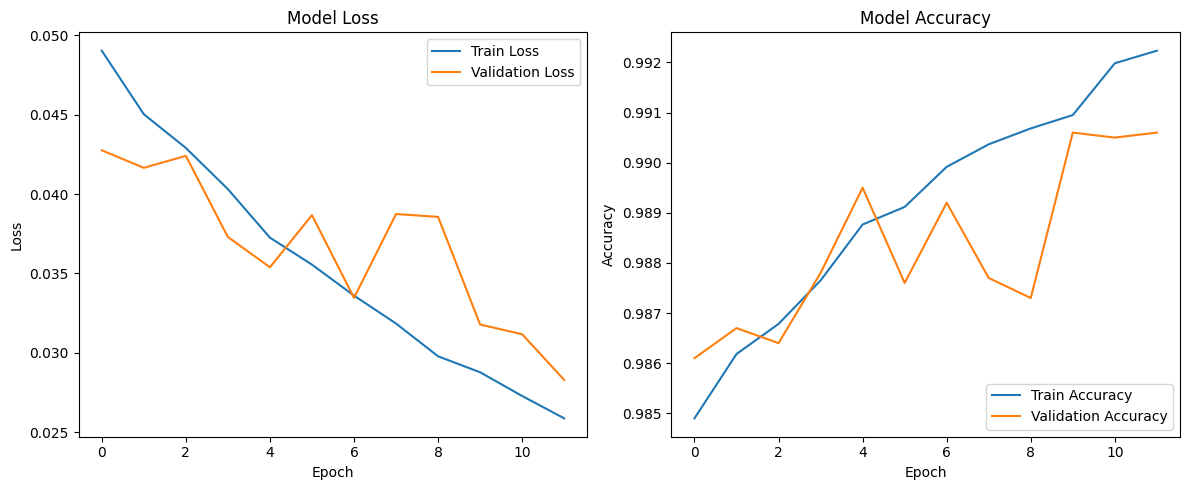

In [29]:

history = model.fit(x_train, y_train, epochs=12, validation_data=(x_test, y_test))


plt.figure(figsize=(12, 5))

# plot the loss diagram
plt.subplot(1, 2, 1)  
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# plot accuracy diagram
plt.subplot(1, 2, 2)  
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')


plt.tight_layout()
plt.show()


In [30]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.9873 - loss: 0.0374
Test Loss: 0.028295254334807396
Test Accuracy: 0.9905999898910522


### 32 & 64

In [31]:

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape)) # 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu')) # 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

# https://keras.io/optimizers/
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(learning_rate=0.1, rho=0.95, decay=0.0), metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6635 - loss: 1.1151 - val_accuracy: 0.9495 - val_loss: 0.1725
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9515 - loss: 0.1623 - val_accuracy: 0.9672 - val_loss: 0.1053
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9665 - loss: 0.1091 - val_accuracy: 0.9739 - val_loss: 0.0859
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9734 - loss: 0.0863 - val_accuracy: 0.9800 - val_loss: 0.0663
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9779 - loss: 0.0723 - val_accuracy: 0.9824 - val_loss: 0.0599
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9813 - loss: 0.0619 - val_accuracy: 0.9829 - val_loss: 0.0554
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9825 - loss: 0.0579 - val_accuracy: 0.9839 - val_loss: 0.0531
Epoch 8/12
469/469 ━━━━━━━━━━━━

Epoch 1/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9885 - loss: 0.0385 - val_accuracy: 0.9859 - val_loss: 0.0419
Epoch 2/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9894 - loss: 0.0327 - val_accuracy: 0.9888 - val_loss: 0.0321
Epoch 3/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9904 - loss: 0.0301 - val_accuracy: 0.9900 - val_loss: 0.0328
Epoch 4/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9930 - loss: 0.0250 - val_accuracy: 0.9903 - val_loss: 0.0311
Epoch 5/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9926 - loss: 0.0245 - val_accuracy: 0.9899 - val_loss: 0.0295
Epoch 6/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9933 - loss: 0.0228 - val_accuracy: 0.9903 - val_loss: 0.0304
Epoch 7/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9941 - loss: 0.0208 - val_accuracy: 0.9904 - val_loss: 0.0287
Epoch 8/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9939 - loss: 0.0204 - 

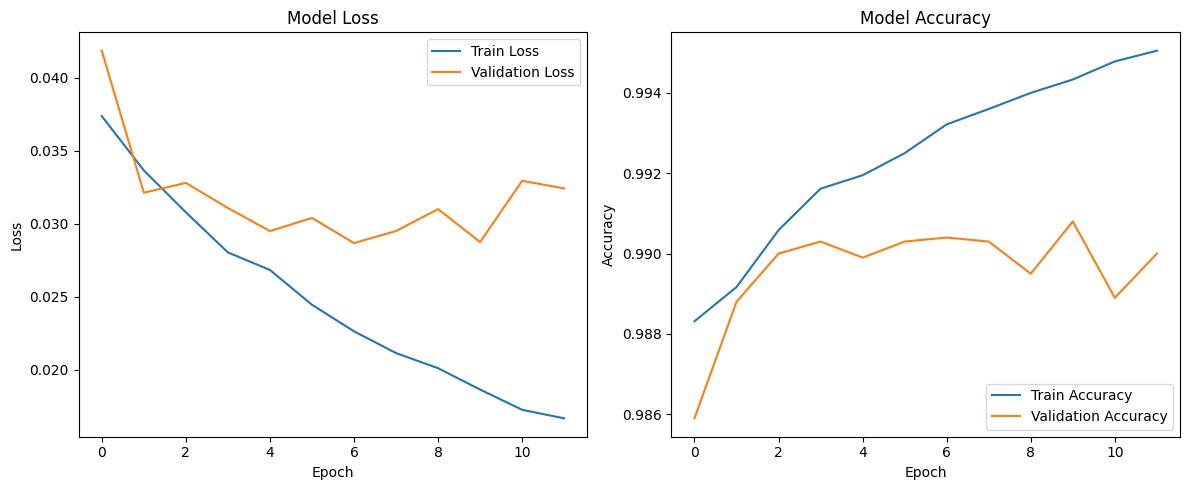

In [32]:


history = model.fit(x_train, y_train, epochs=12, validation_data=(x_test, y_test))


plt.figure(figsize=(12, 5))

# plot the loss diagram
plt.subplot(1, 2, 1)  
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# plot accuracy diagram
plt.subplot(1, 2, 2)  
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')


plt.tight_layout()
plt.show()


In [33]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9876 - loss: 0.0400
Test Loss: 0.03242706507444382
Test Accuracy: 0.9900000095367432
